# Load module

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os

# Define datasets path

In [5]:
# Paths

base_path = 'D:\Programming_File\Tensorflow_Files'
train_path = 'datasets/train_set'
val_path = 'datasets/val_set'
train_dir = os.path.join(base_path, train_path)
val_dir = os.path.join(base_path, val_path)
target_size = (64, 64)  # height, width in torchvision is (H, W)

print(f"Train directory exists: {train_dir}") if(os.path.exists(train_dir)) else print(f"Train directory does not exist: {train_dir}")
print(f"Validation directory exists: {val_dir}") if (os.path.exists(val_dir)) else print(f"Validation directory does not exist: {val_dir}")

Train directory exists: D:\Programming_File\Tensorflow_Files\datasets/train_set
Validation directory exists: D:\Programming_File\Tensorflow_Files\datasets/val_set


# Define Augumentation

In [6]:
# ===== Augmentation for training =====
train_transforms = transforms.Compose([
    transforms.Resize(target_size),                  # Resize to (64, 64)
    transforms.RandomRotation(20),                   # rotation_range=20
    transforms.RandomAffine(
        degrees=0,                                   # No extra rotation (already done above)
        translate=(0.2, 0.2),                        # width_shift & height_shift range=0.2
        shear=0.9 * (180 / 3.14159265),               # shear_range in degrees (0.9 rad ≈ 51.57°)
        scale=(1-0.2, 1+0.2)                          # zoom_range=0.2
    ),
    transforms.RandomHorizontalFlip(p=1.0),          # horizontal_flip=True
    transforms.ToTensor(),                           # Convert to tensor [0,1]
    # In TF you rescaled by 1/255, ToTensor() already does that
])

# ===== For validation: often same preprocessing, but no random augmentation =====
val_transforms = transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor(),
])

# Load datasets

In [7]:
# ===== Load datasets =====
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transforms)

# ===== Data loaders =====
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [8]:
# Check classes mapping
print(train_dataset.class_to_idx)

{'cat': 0, 'dog': 1}


# Visulize some datasets

In [11]:
type(images)

torch.Tensor

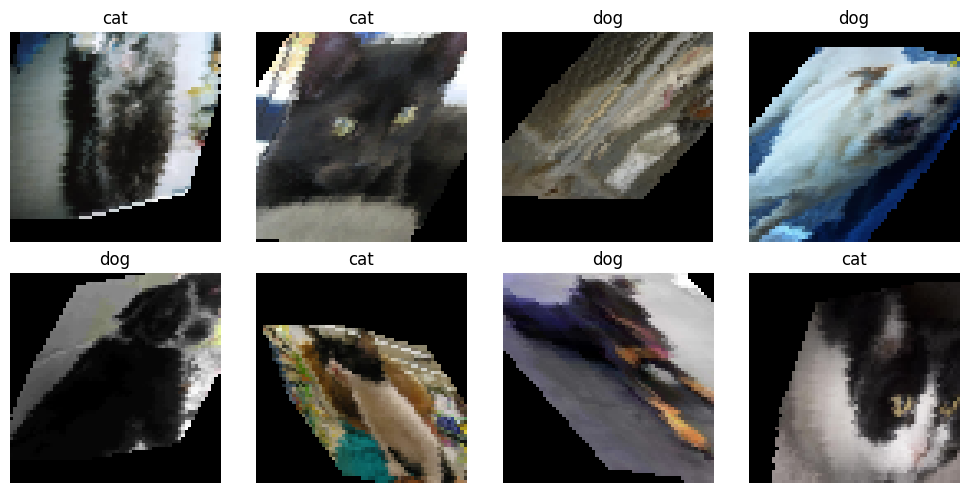

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Class names from ImageFolder
class_names = train_dataset.classes

# Show a batch from train_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Plot first 8 images
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    img = images[i].numpy().transpose((1, 2, 0))  # C,H,W -> H,W,C
    img = np.clip(img, 0, 1)  # ensure values are in [0,1] for matplotlib
    ax.imshow(img)
    ax.set_title(class_names[labels[i]])
    ax.axis('off')

plt.tight_layout()
plt.show()

# Data access

## datasets

In [40]:
class_names = train_dataset.classes
img, label = train_dataset[10]
print("Label index:", label)
print("Label name:", class_names[label])

Label index: 0
Label name: cat


## dataloader

In [ ]:
# there is no way access specific batch in DataLoader directly, 
data_iter = iter(train_loader)
images, labels = next(data_iter)  # a batch
images1, labels1 = next(data_iter)  # a batch
images2, labels2 = next(data_iter)  # another batch

In [ ]:
img = images[5]   # tensor for sample #5 in the batch
label = labels[5] # label for that image

In [ ]:
print("Label index:", label.item())
print("Label name:", class_names[label.item()])
